# Delhi Delights
by Shweta AT

### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading and Understanding the dataset

In [4]:
df = pd.read_csv('Delhi+Delights+Data.csv')
df.head()

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [6]:
df.describe()

,Average Delivery Rating (a1),Average Orders per month (a2)
count,30.000000,30.000000
mean,3.066667,21.000000
std,1.040004,10.763924
min,1.500000,11.000000
25%,2.500000,13.000000
50%,3.000000,15.000000
75%,3.500000,27.000000
max,4.500000,39.000000


In [8]:
df.columns

Index(['Average Delivery Rating (a1)', 'Average Orders per month (a2)',
       '"Delighted Members" Purchase'],
      dtype='object')

In [9]:
df

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No
5,4.5,11,Yes
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
9,3.5,13,No


In [10]:
df.shape

(30, 3)

### Data Cleaning/Preparation

In [7]:
df.isnull().mean()

Average Delivery Rating (a1)     0.0
Average Orders per month (a2)    0.0
"Delighted Members" Purchase     0.0
dtype: float64

no null or missing values

### EDA

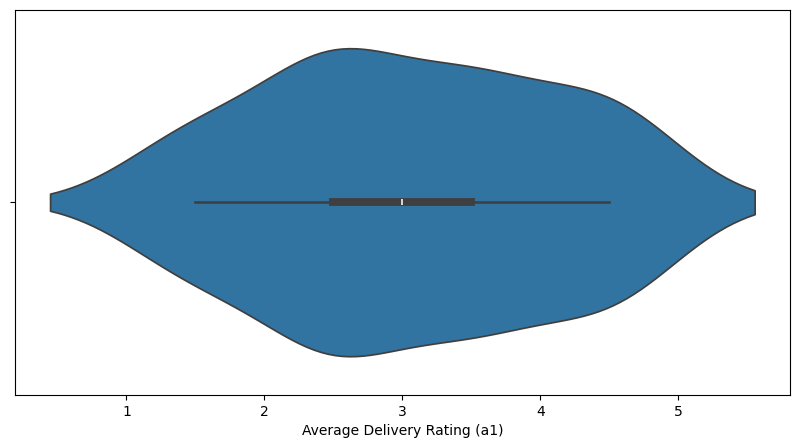

In [27]:
plt.figure(figsize=(10,5))
ax = sns.violinplot(df['Average Delivery Rating (a1)'], orient='h')
plt.show()

No outliers

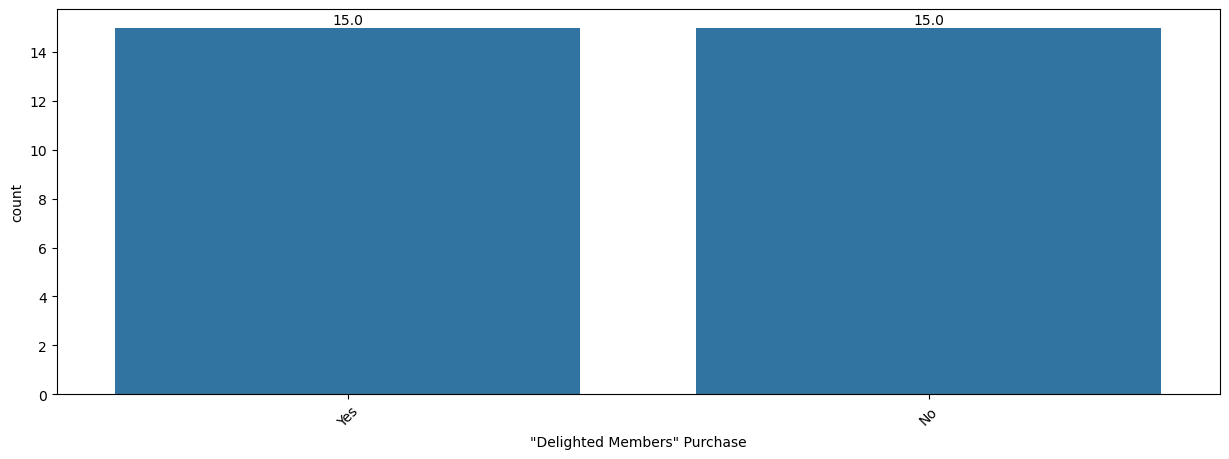

In [25]:
plt.figure(figsize=(15, 5))  # Adjust the figure size accordingly
ax = sns.countplot(x=df['"Delighted Members" Purchase'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

Balanced Dataset over "Delighted Members" Purchase' field

In [28]:
df['"Delighted Members" Purchase'].value_counts(ascending=False)*100/len(df)

"Delighted Members" Purchase
Yes    50.0
No     50.0
Name: count, dtype: float64

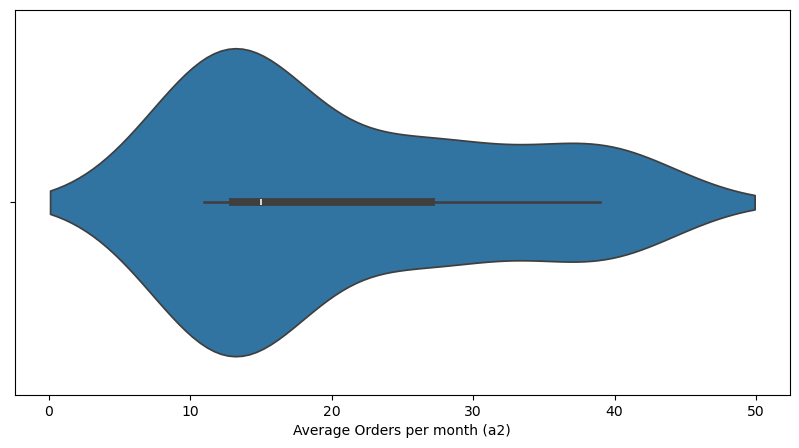

In [30]:
plt.figure(figsize=(10,5))
ax=sns.violinplot(df['Average Orders per month (a2)'], orient='h')
plt.show()

No outliers

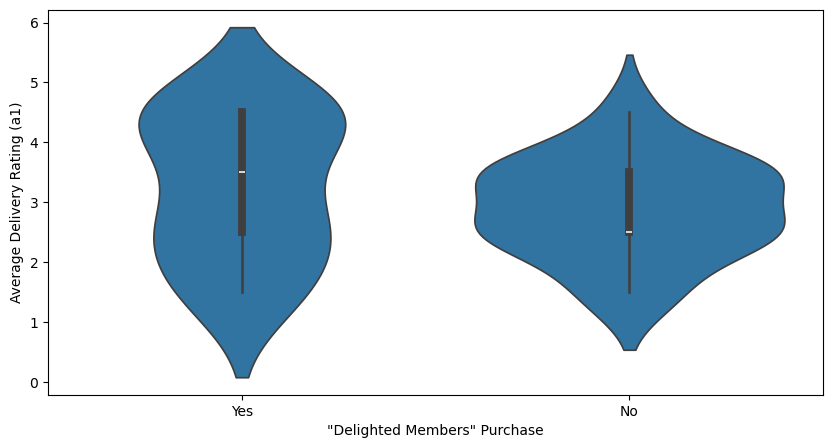

In [31]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Average Delivery Rating (a1)', x = '"Delighted Members" Purchase', data = df)
plt.show()

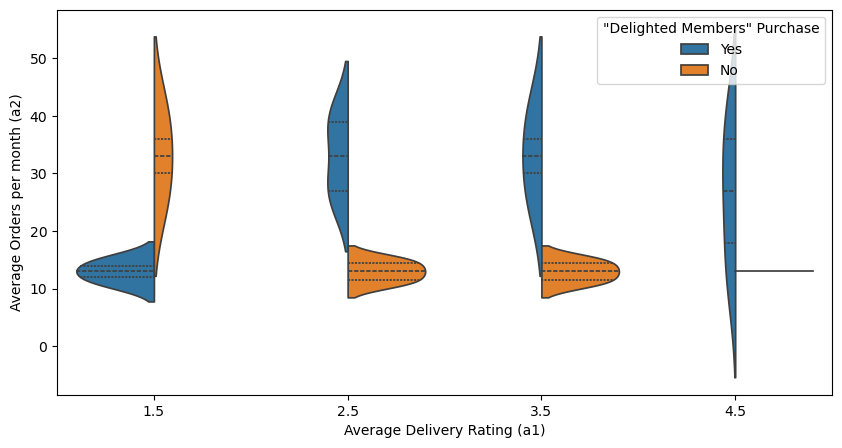

In [32]:
plt.figure(figsize=(10,5))
sns.violinplot(y='Average Orders per month (a2)',x='Average Delivery Rating (a1)',hue='"Delighted Members" Purchase',
              split=True,data=df,inner="quartile")
plt.show()

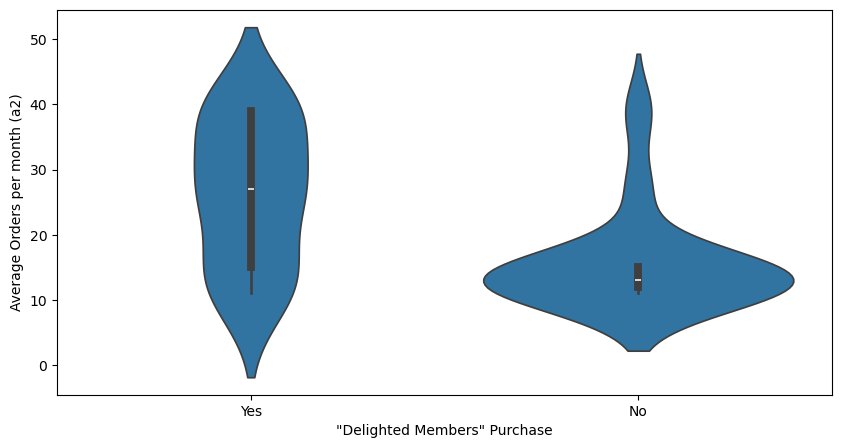

In [33]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'Average Orders per month (a2)', x = '"Delighted Members" Purchase', data = df)
plt.show()

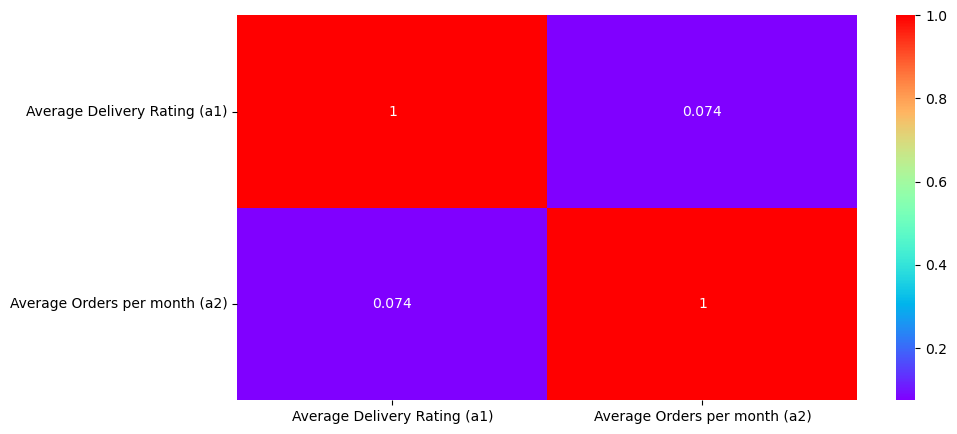

In [36]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="rainbow")
plt.show()

In [37]:
# Putting feature variable to X
X = df.drop('"Delighted Members" Purchase',axis=1)

# Putting response variable to y
y = df['"Delighted Members" Purchase']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=10)
X_train.shape,X_test.shape

((21, 2), (9, 2))

In [40]:

from sklearn.tree import DecisionTreeClassifier

### Decision Tree over whole dataset

In [42]:
dt = DecisionTreeClassifier()
dt.fit(X, y)

DecisionTreeClassifier()

In [43]:
from sklearn import tree

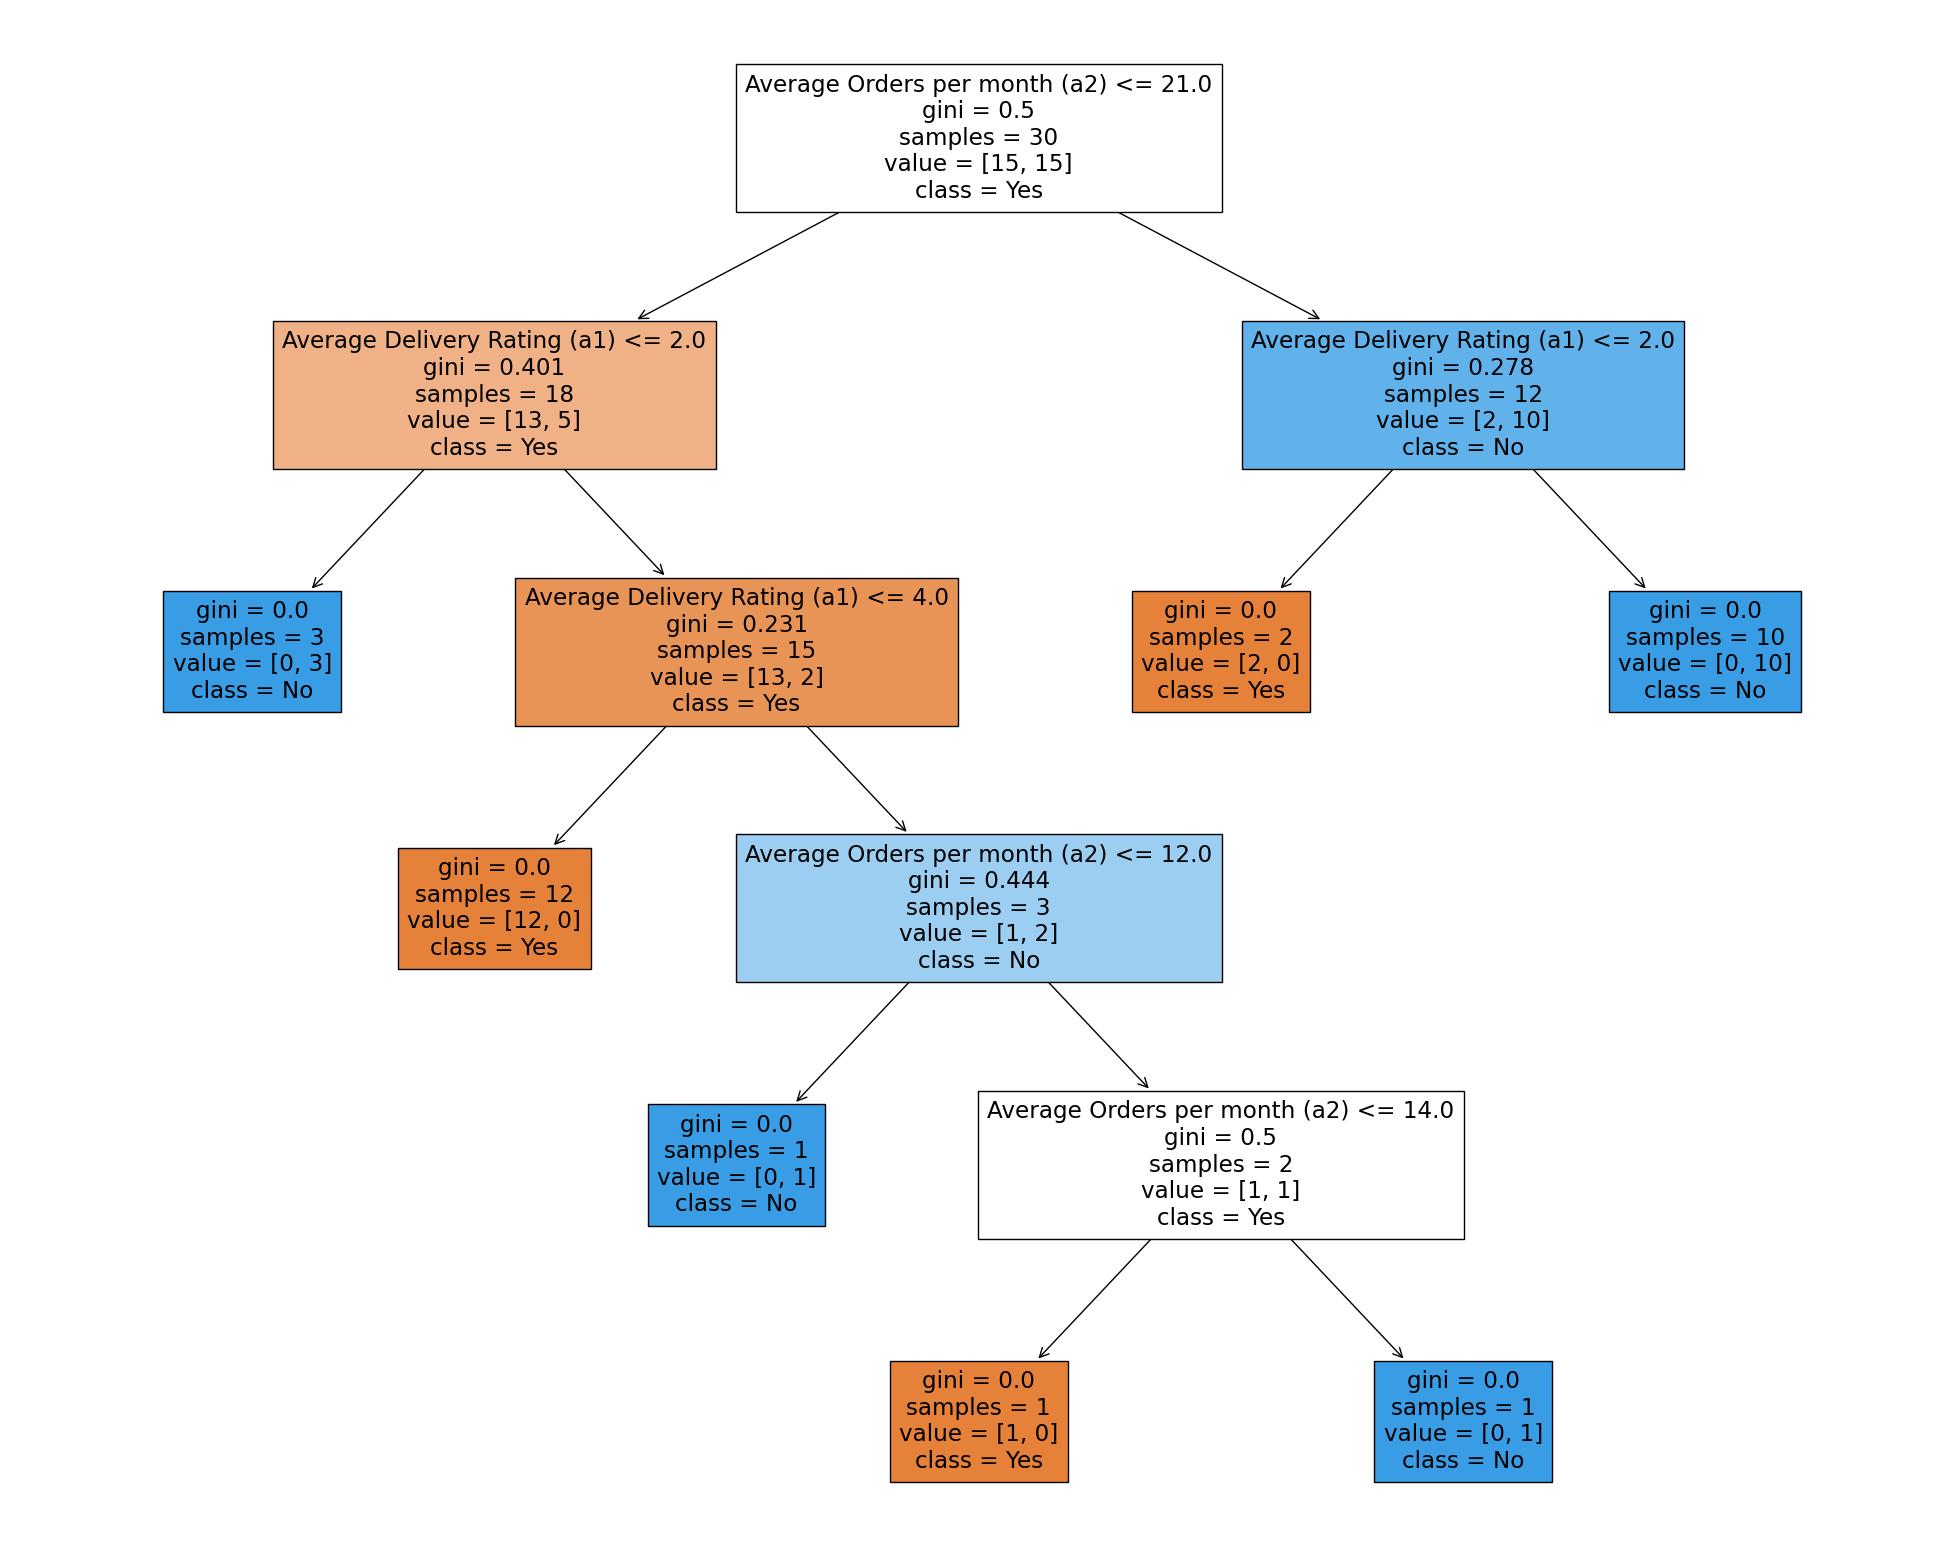

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

><b>Using the following hyperparameters to solve the following questions:</b>

max_depth = 5

min_samples_split = 10

min_samples_leaf = 5

Homogeneity measure = Gini

In [45]:
dt = DecisionTreeClassifier(max_depth = 5,min_samples_split = 10,min_samples_leaf = 5)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [46]:
from sklearn import tree

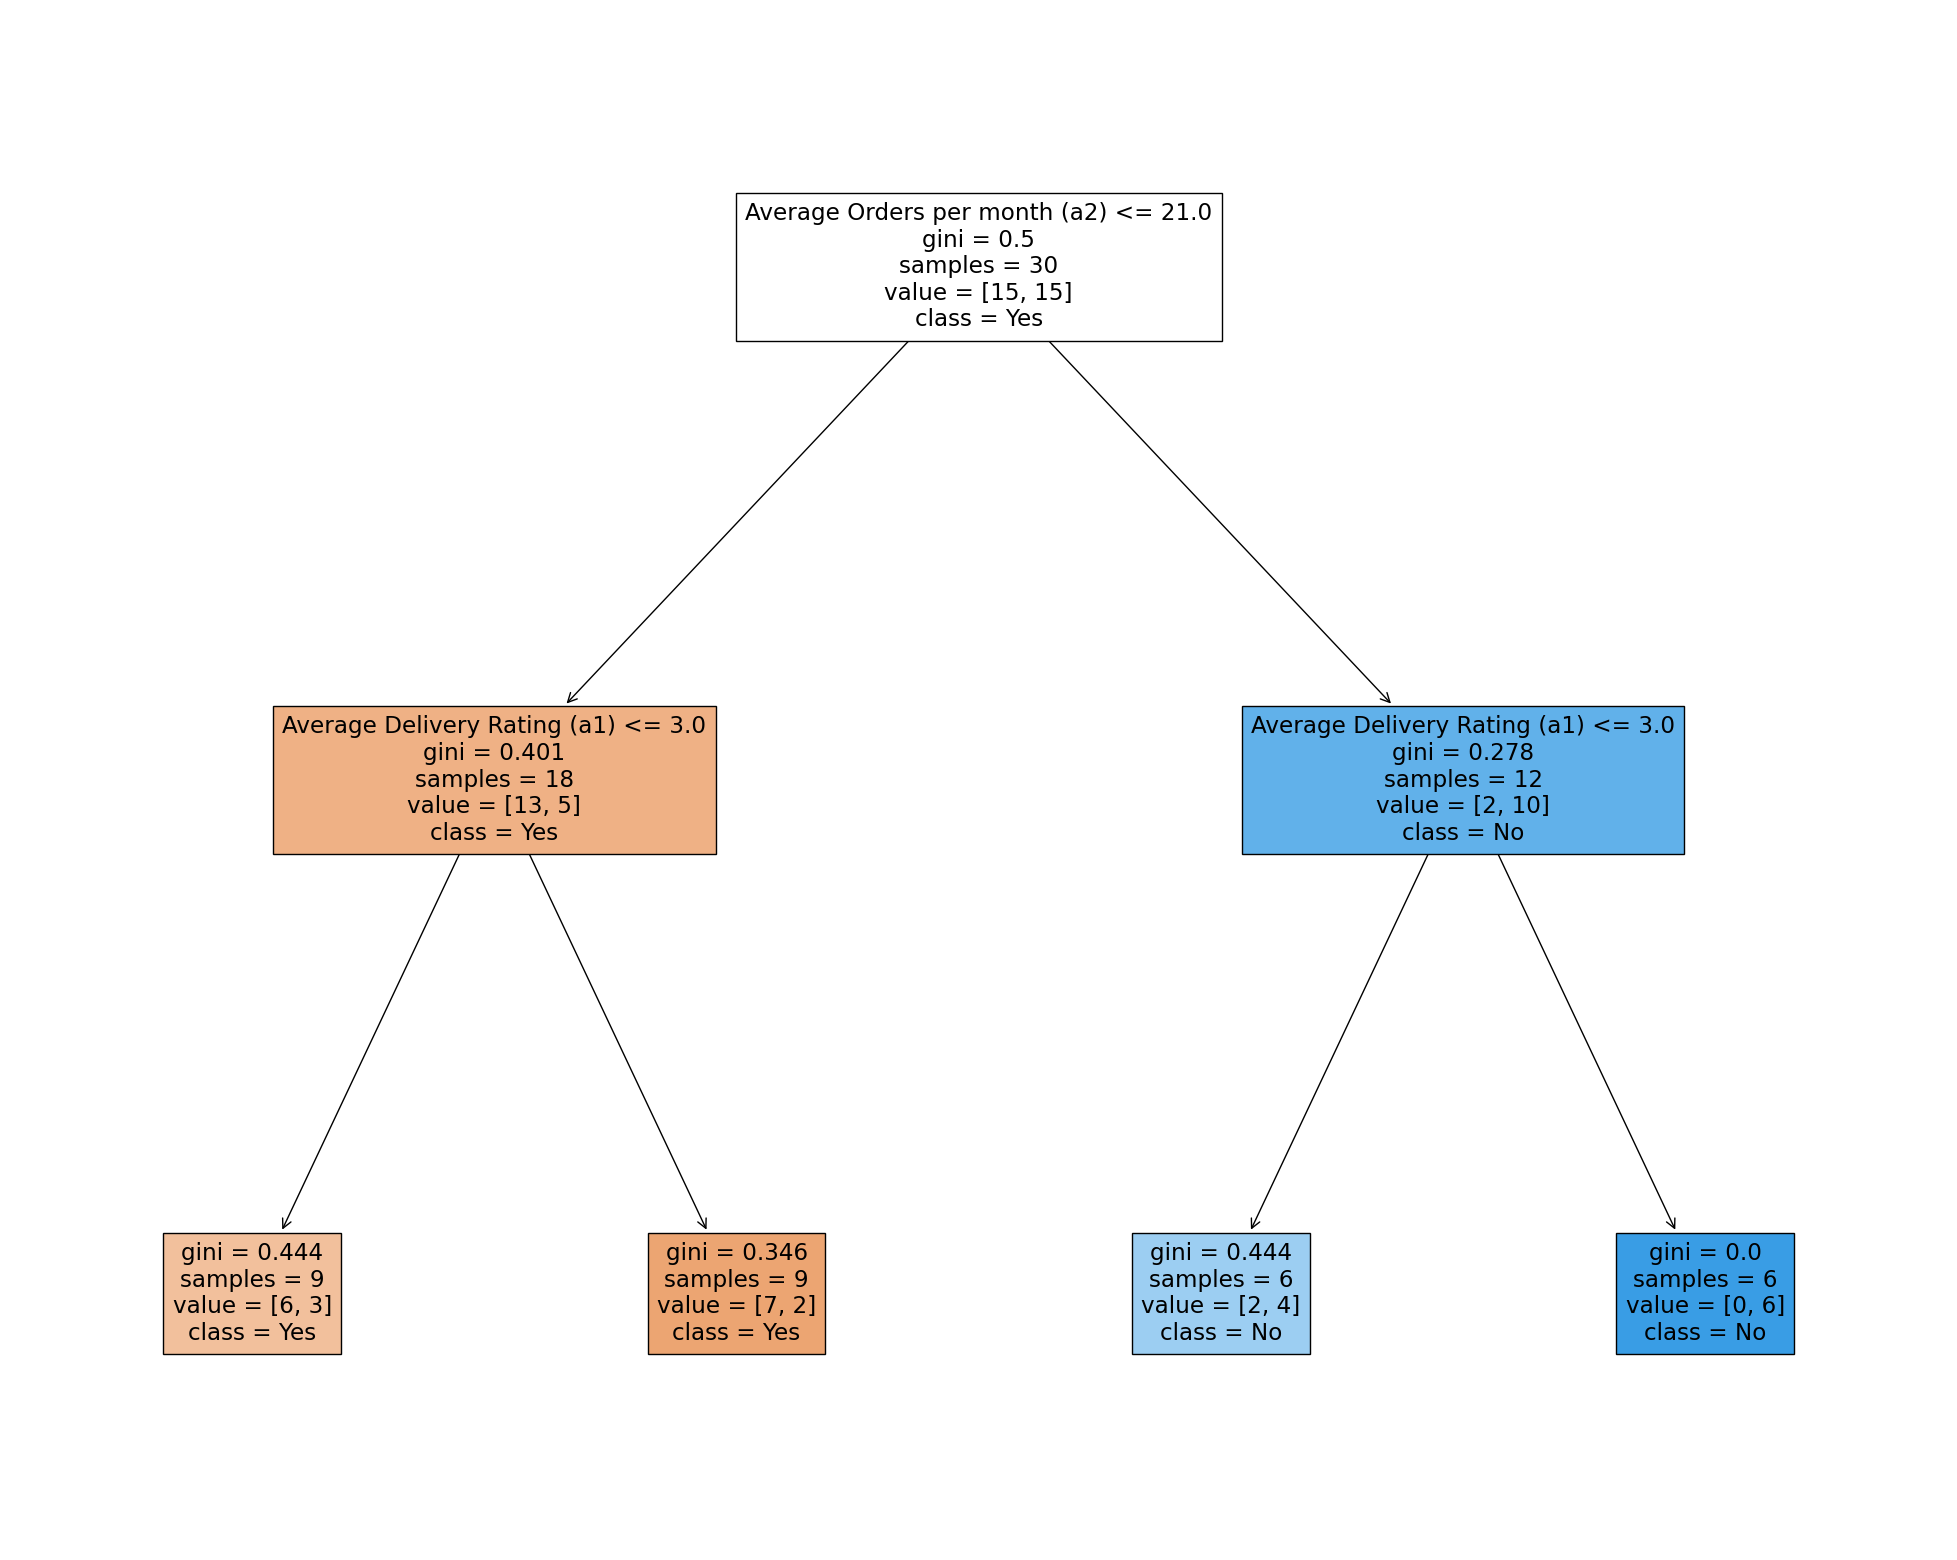

In [47]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

### Decision Tree over test dataset

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=7)

In [50]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", round(accuracy_score(y_train, dt_classifier.predict(X_train)),2))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", round(accuracy_score(y_test, dt_classifier.predict(X_test)),2))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [51]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[11  0]
 [ 0 10]]
--------------------------------------------------
Test Accuracy : 0.89
Test Confusion Matrix:
[[4 0]
 [1 4]]


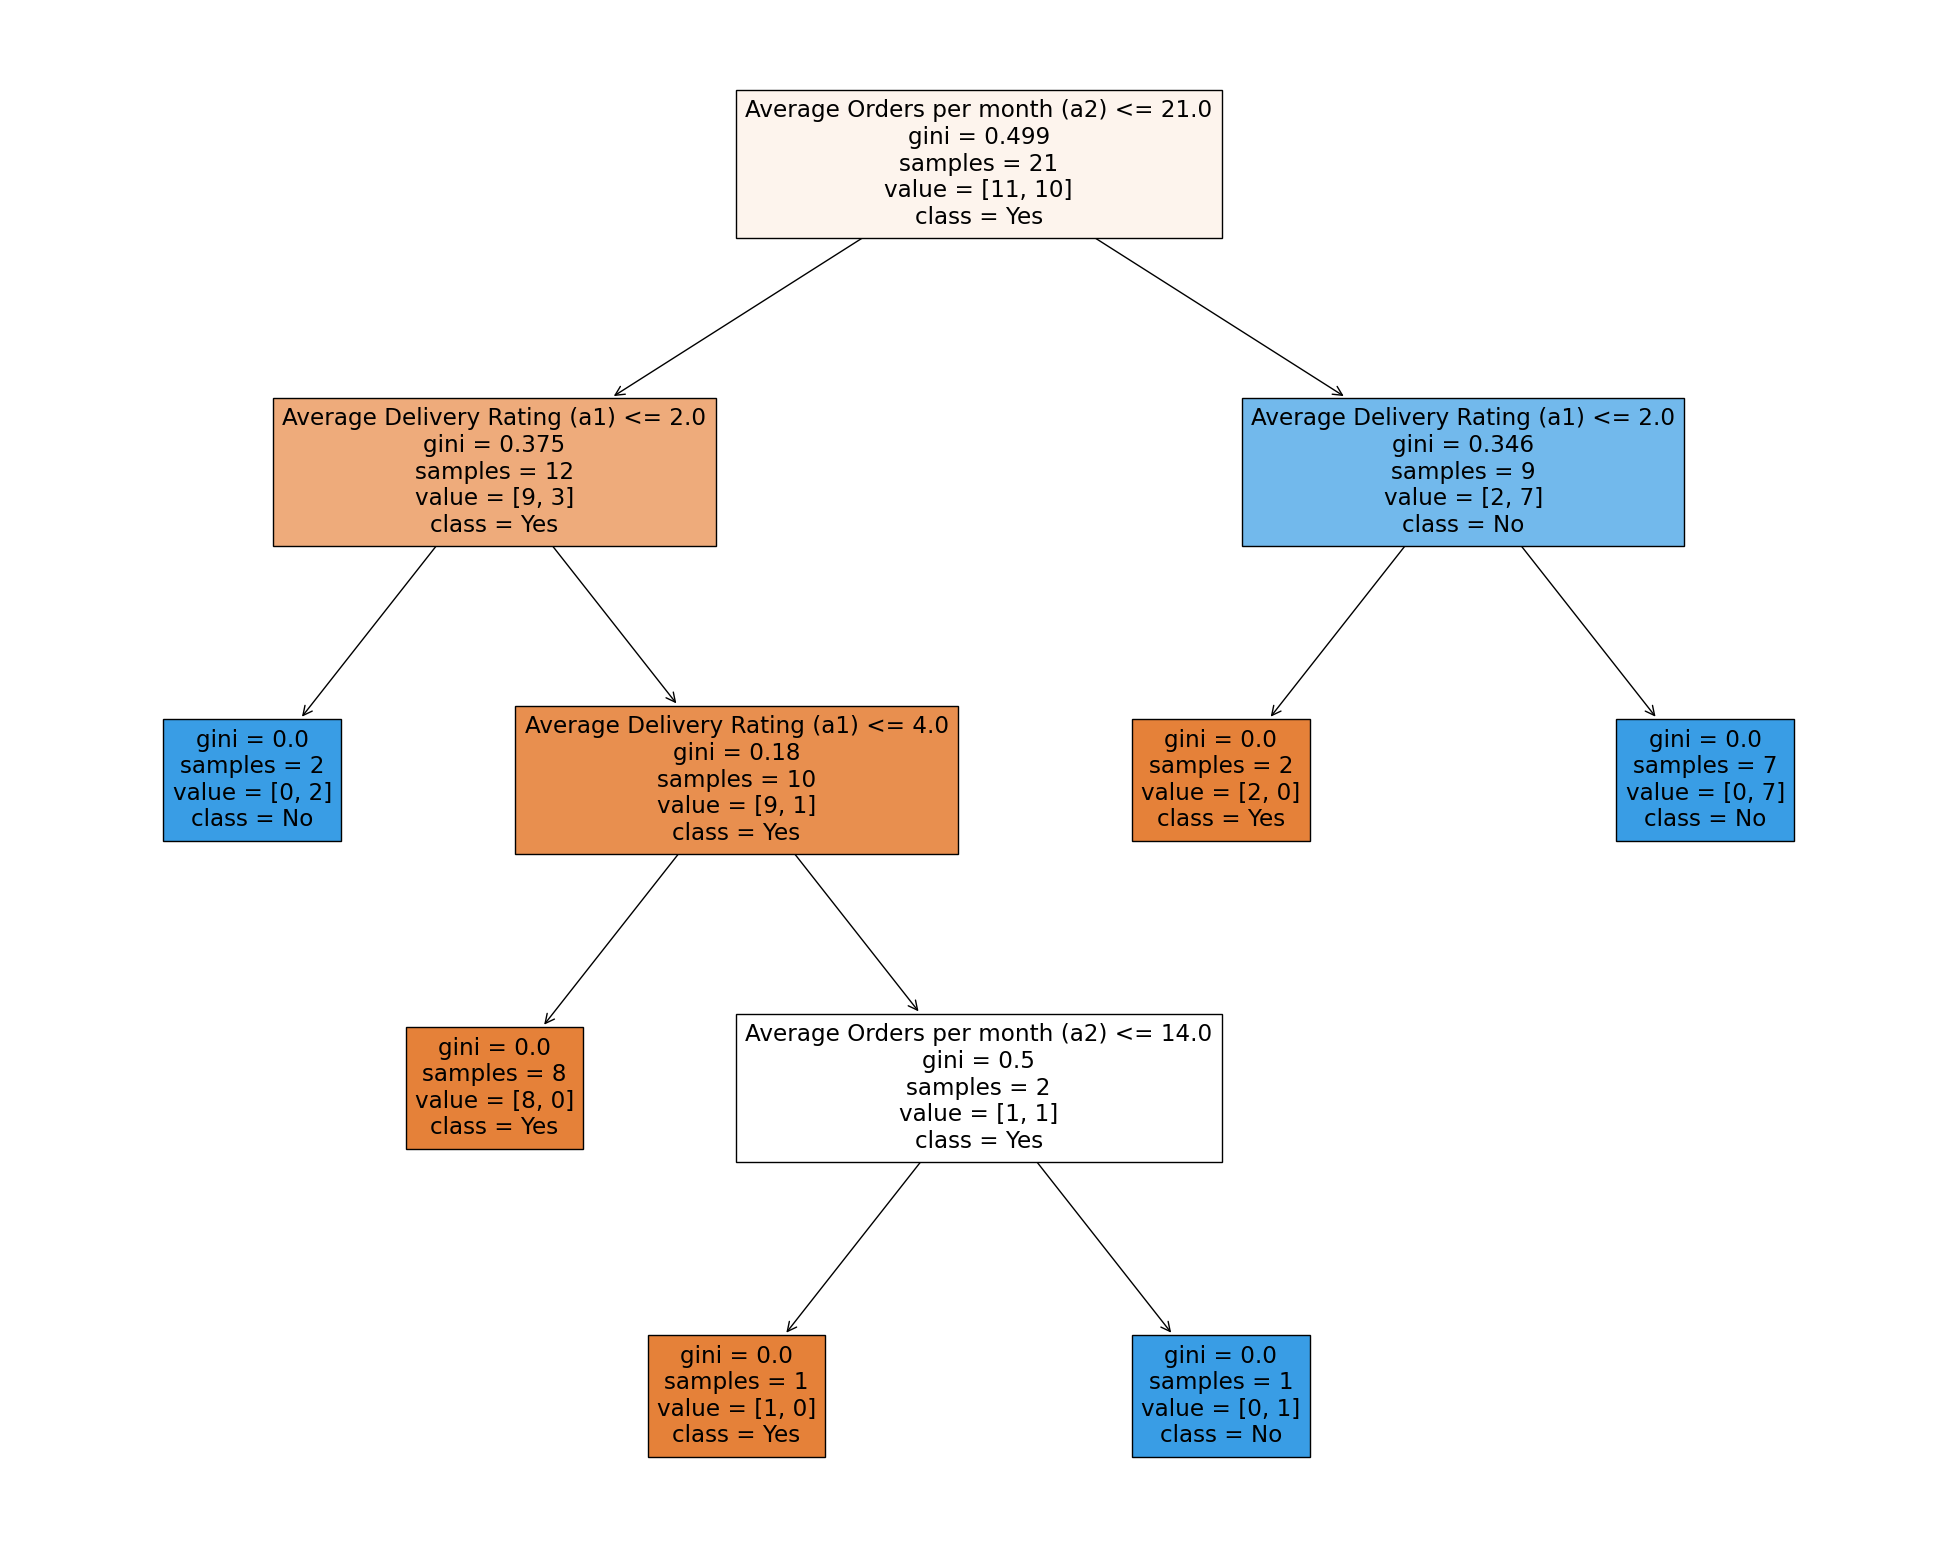

In [52]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [54]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", round(accuracy_score(y_train, dt_classifier.predict(X_train)),2))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", round(accuracy_score(y_test, dt_classifier.predict(X_test)),2))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [55]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[11  0]
 [ 0 10]]
--------------------------------------------------
Test Accuracy : 0.89
Test Confusion Matrix:
[[4 0]
 [1 4]]


### Train Accuracy as 1 means overfitting model. Opted for Hyper-parameter tuning of this model

In [56]:
dt = DecisionTreeClassifier(random_state=50)

In [57]:

from sklearn.model_selection import GridSearchCV

In [58]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4,5, 6],
    'min_samples_leaf': [1,2,3,4,5],
    'criterion': ["gini", "entropy"]
}

In [59]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [60]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 344 ms
Wall time: 20.4 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [61]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009454,0.009729,0.037645,0.039938,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.000000,1.0,0.8,0.8,0.900000,0.100000,1
1,0.011717,0.006765,0.000000,0.000000,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.6,0.716667,0.086603,11
2,0.011829,0.007023,0.004018,0.005593,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.4,0.666667,0.163299,26
3,0.011727,0.006771,0.000000,0.000000,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.4,0.666667,0.163299,26
4,0.007816,0.007816,0.003904,0.006762,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.8,0.8,0.6,0.716667,0.086603,11


In [62]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009454,0.009729,0.037645,0.039938,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",1.0,1.0,0.8,0.8,0.90,0.100000,1
10,0.010899,0.012267,0.033336,0.019702,gini,4,1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
15,0.007813,0.013532,0.007937,0.005641,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
20,0.007824,0.007824,0.000000,0.000000,gini,6,1,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",1.0,0.8,1.0,0.8,0.90,0.100000,1
35,0.007517,0.007517,0.004560,0.007898,entropy,4,1,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",1.0,0.6,1.0,0.8,0.85,0.165831,5


In [63]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=50)

In [64]:
dt_best = grid_search.best_estimator_

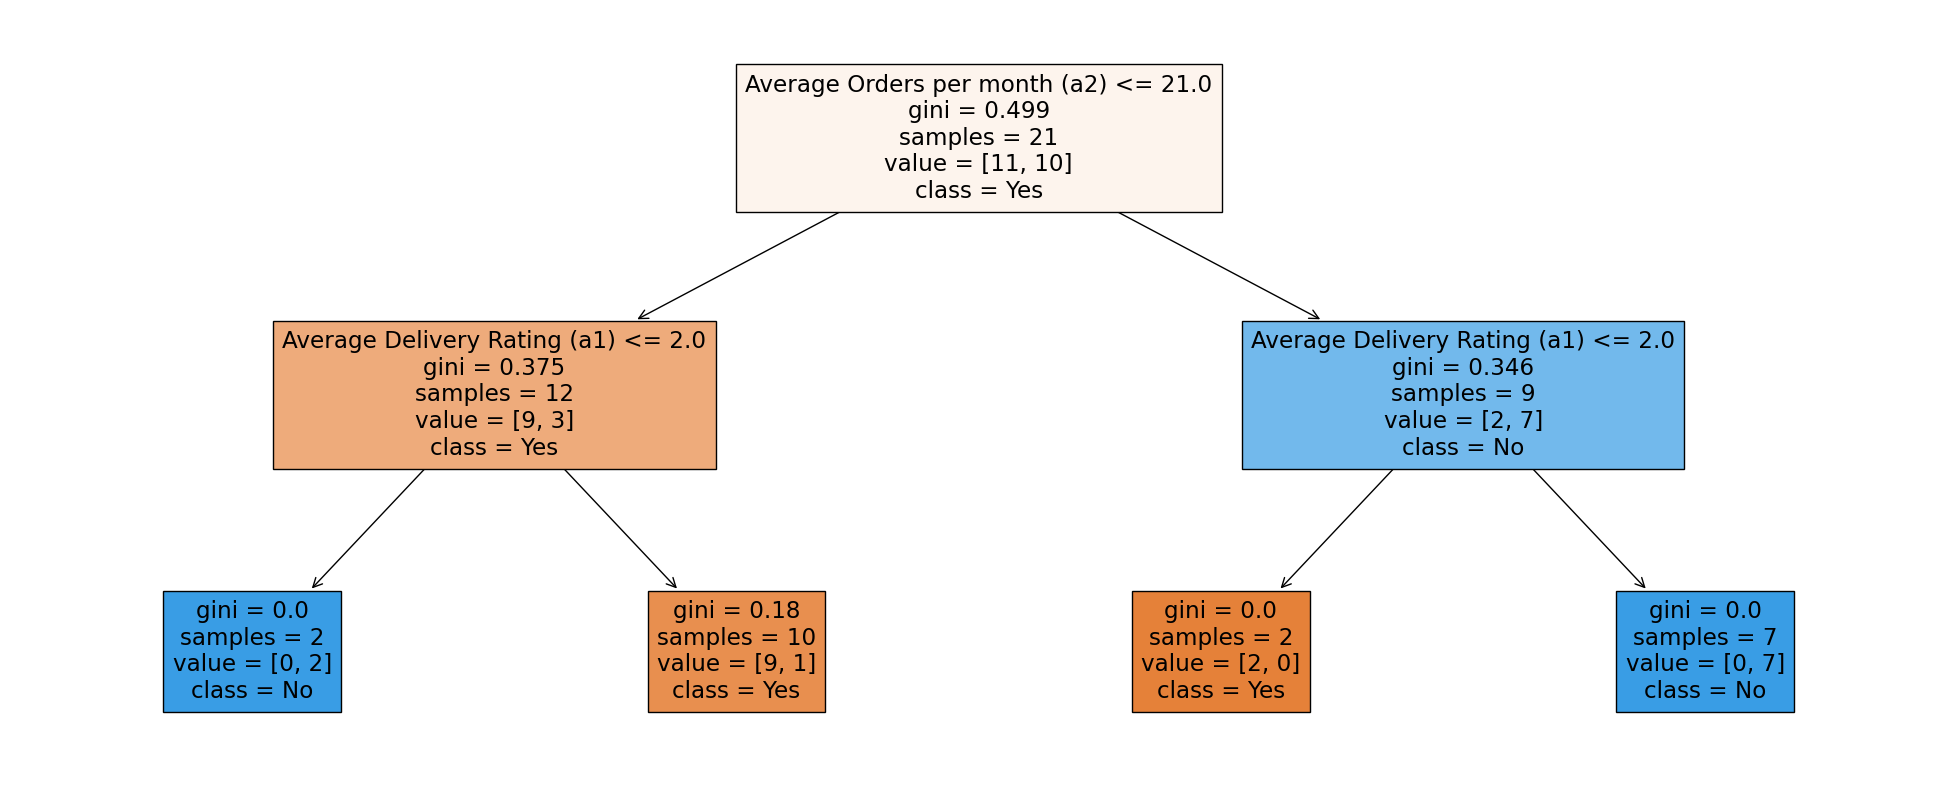

In [65]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dt_best,
                   feature_names=X.columns,
                   class_names=['Yes', "No"],
                   filled=True)

In [66]:
evaluate_model(dt_best)

Train Accuracy : 0.95
Train Confusion Matrix:
[[11  0]
 [ 1  9]]
--------------------------------------------------
Test Accuracy : 0.89
Test Confusion Matrix:
[[4 0]
 [1 4]]


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89         4
         Yes       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9



In [69]:
print(classification_report(y_train, dt_best.predict(X_train)))

              precision    recall  f1-score   support

          No       0.92      1.00      0.96        11
         Yes       1.00      0.90      0.95        10

    accuracy                           0.95        21
   macro avg       0.96      0.95      0.95        21
weighted avg       0.96      0.95      0.95        21

